In [9]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
import glob
from IPython.display import clear_output
import os  
import sys 
import pyodm 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score
import markdown

# 將圖片的顏色資訊轉為特徵向量

1.“calculate_global_color_histogram”函數接受一個輸入圖像，將其轉換為HSV色彩空間，使用8個通道對應8個直方圖條帶進行計算其色彩直方圖，然後對直方圖進行標準化處理並壓平成一維數組。

2.分別從“train.txt”、“val.txt”、“test.txt”的文件中讀取一組圖像文件名稱和對應的標籤，用“Image”模組打開每個圖像，將其轉換為NumPy數組，將顏色空間轉換為BGR，使用“calculate_global_color_histogram”函數計算全局顏色直方圖，然後將得到的直方圖添加到“features0”、“features1”、“features2”數組中。相應的標籤也被添加到“labels_0”、“labels_1”、“labels_2”數組中。

In [2]:
def calculate_global_color_histogram(image):
    # 將圖像轉換為HSV色彩空間
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # 計算直方圖
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # 標準化直方圖
    hist = cv2.normalize(hist, hist).flatten()
    return hist

labels = []
features0=[]
#for i in range(len(features1)):
with open('train.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_0 = np.array(image)
        labels_0=labels.append(label)
        image_data_0=cv2.cvtColor(image_data_0, cv2.COLOR_RGB2BGR)
        hist = calculate_global_color_histogram(image_data_0)
        features0.append(hist)
features0 = np.array(features0)
labels_0 = np.array(labels)
print(features0)
print(features0.shape)
print(labels_0.shape)

[[0.08661325 0.03387291 0.01317771 ... 0.         0.         0.        ]
 [0.02643868 0.12184548 0.10981804 ... 0.         0.         0.        ]
 [0.01820493 0.02306348 0.00778539 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00059613 ... 0.         0.         0.        ]
 [0.02573715 0.00413633 0.00166602 ... 0.         0.         0.        ]
 [0.00248319 0.01532307 0.04009436 ... 0.         0.         0.        ]]
(63325, 512)
(63325,)


In [3]:
labels = []
features1=[]
#for i in range(len(features1)):
with open('test.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_1 = np.array(image)
        labels_1=labels.append(label)
        
        image_data_1=cv2.cvtColor(image_data_1, cv2.COLOR_RGB2BGR)
        hist = calculate_global_color_histogram(image_data_1)
        features1.append(hist)
features1 = np.array(features1)
labels_1=np.array(labels)
print(features1)
print(features1.shape)
print(labels_1.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.23347905 0.00023636 0.         ... 0.         0.         0.        ]
 [0.23229899 0.09332479 0.0519429  ... 0.         0.         0.        ]
 ...
 [0.05101004 0.00850167 0.00297922 ... 0.         0.         0.        ]
 [0.00382916 0.00296625 0.00334377 ... 0.         0.         0.        ]
 [0.01941418 0.1143352  0.16475995 ... 0.         0.         0.        ]]
(450, 512)
(450,)


In [4]:
labels = []
features2=[]
#for i in range(len(features1)):
with open('val.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_2 = np.array(image)
        labels_2=labels.append(label)
        image_data_2=cv2.cvtColor(image_data_2, cv2.COLOR_RGB2BGR)
        hist = calculate_global_color_histogram(image_data_2)
        features2.append(hist)
features2 = np.array(features2)
labels_2 = np.array(labels)
print(features2)
print(features2.shape)
print(labels_2.shape)

[[1.1031483e-01 1.4827338e-01 1.9299753e-02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.4235074e-04 1.1126400e-02 3.4805660e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.4327262e-04 1.5751902e-02 2.1529626e-02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.2330565e-02 6.1886171e-03 3.7937881e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.8903716e-04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.6251788e-05 3.8125894e-05 1.1437768e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
(450, 512)
(450,)


# 建模-進行影像分類預測

使用SVM、Random Forest、LightGBM、AdaBoost、CatBoost、XGBoost建模，並以accuracy衡量模型表現

In [5]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1, gamma='auto')
model.fit(features0, labels_0)

SVC(C=1, gamma='auto', kernel='linear')

In [6]:
y_pred = model.predict(features1)
accuracy_1 = accuracy_score(labels_1, y_pred)
print('Accuracy:', accuracy_1)
val_preds = model.predict(features2)
val_acc_1 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_1)

Accuracy: 0.10222222222222223
Validation Accuracy: 0.13111111111111112


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42)
rf.fit(features0, labels_0)
accuracy_2 = rf.score(features1,labels_1)
print("Accuracy:", accuracy_2)
val_preds = rf.predict(features2)
val_acc_2 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_2)

Accuracy: 0.14444444444444443
Validation Accuracy: 0.13777777777777778


In [8]:
import lightgbm as lgb
model = lgb.LGBMClassifier(is_unbalance=True)
model.fit(features0,labels_0)
pred=model.predict(features1)
accuracy_3=accuracy_score(labels_1, pred)
print("Accuracy:", accuracy_3)
val_preds = model.predict(features2)
val_acc_3 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_3)

Accuracy: 0.18666666666666668
Validation Accuracy: 0.20444444444444446


In [9]:
from sklearn import ensemble, preprocessing, metrics
boost = ensemble.AdaBoostClassifier(n_estimators = 100)
boost_fit = boost.fit(features0, labels_0)

# 預測
test_y_predicted = boost.predict(features1)

# 績效
accuracy_4 = metrics.accuracy_score(labels_1, test_y_predicted)
print(accuracy_4)
val_preds = boost.predict(features2)
val_acc_4 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_4)

0.08444444444444445
Validation Accuracy: 0.10888888888888888


In [10]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, depth=5)
model.fit(features0, labels_0)
y_pred = model.predict(features1)
accuracy_5=accuracy_score(labels_1, y_pred)
print(accuracy_5)
val_preds = model.predict(features2)
val_acc_5 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_5)

Learning rate set to 0.5
0:	learn: 3.7628454	total: 9.14s	remaining: 15m 4s
1:	learn: 3.6957501	total: 18s	remaining: 14m 42s
2:	learn: 3.6268815	total: 27.1s	remaining: 14m 35s
3:	learn: 3.5748805	total: 36.3s	remaining: 14m 30s
4:	learn: 3.5245864	total: 44.7s	remaining: 14m 8s
5:	learn: 3.4928999	total: 53.3s	remaining: 13m 55s
6:	learn: 3.4633670	total: 1m 2s	remaining: 13m 47s
7:	learn: 3.4317445	total: 1m 11s	remaining: 13m 37s
8:	learn: 3.4047738	total: 1m 19s	remaining: 13m 26s
9:	learn: 3.3849323	total: 1m 28s	remaining: 13m 15s
10:	learn: 3.3613707	total: 1m 37s	remaining: 13m 6s
11:	learn: 3.3439557	total: 1m 46s	remaining: 12m 57s
12:	learn: 3.3250520	total: 1m 54s	remaining: 12m 46s
13:	learn: 3.3025861	total: 2m 3s	remaining: 12m 36s
14:	learn: 3.2843043	total: 2m 11s	remaining: 12m 27s
15:	learn: 3.2731835	total: 2m 20s	remaining: 12m 16s
16:	learn: 3.2592078	total: 2m 29s	remaining: 12m 7s
17:	learn: 3.2479119	total: 2m 37s	remaining: 11m 58s
18:	learn: 3.2313536	total:

In [11]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(features0, labels_0)
y_pred = model.predict(features1)
accuracy_6=accuracy_score(labels_1, y_pred)
print(accuracy_6)
val_preds = model.predict(features2)
val_acc_6 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_6)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.19777777777777777
Validation Accuracy: 0.21555555555555556


# 比較在驗證資料集與測試資料集中，各模型的accuracy，並繪成長條圖

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (450,) and requested shape (6,)

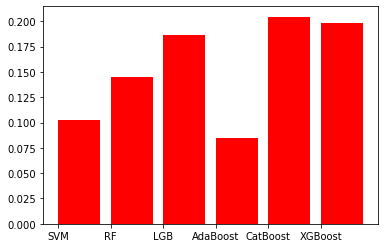

In [16]:
N=np.array(['SVM', 'RF', 'LGB', 'AdaBoost', 'CatBoost','XGBoost'])
M=np.array([val_acc_1,val_acc_2,val_acc_3,val_acc_4,val_acc_5,val_acc_6])
J=np.array([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6])
plt.bar(N, J, color='red', linewidth=2,align='edge',tick_label=labels)
labels = ['SVM', 'RF', 'LGB', 'AdaBoost', 'CatBoost','XGBoost']
#plt.plot(N, J, color='blue', linestyle="-", linewidth="2", markersize="16", marker=".", label="Plot 2")
plt.title('Test Accuracy')
#plt.xlim(0, 0.5) # 設定 x 軸座標範圍
#plt.ylim(0, 0.5) # 設定 y 軸座標範圍




plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (450,) and requested shape (6,)

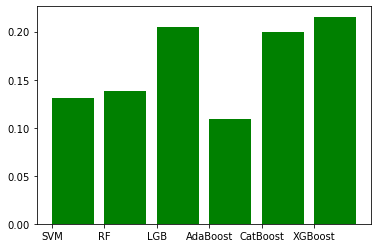

In [17]:
N=np.array(['SVM', 'RF', 'LGB', 'AdaBoost', 'CatBoost','XGBoost'])
M=np.array([val_acc_1,val_acc_2,val_acc_3,val_acc_4,val_acc_5,val_acc_6])
J=np.array([accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6])
plt.bar(N, M, color='green', linewidth=2,align='edge',tick_label=labels)
labels = ['SVM', 'RF', 'LGB', 'AdaBoost', 'CatBoost','XGBoost']
plt.title('Validation Accuracy')
plt.show()

# 繪出Random Forest和CatBoost的Training accuracy Curve和Validation accuracy Curve

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)

train_accs = []
val_accs = []

for epoch in range(10):
    rf.fit(features0, labels_0)
    
    # Evaluate on the training data
    train_preds = rf.predict(features0)
    train_acc = accuracy_score(labels_0, train_preds)
    train_accs.append(train_acc)
    
    # Evaluate on the validation data
    val_preds = rf.predict(features1)
    val_acc = accuracy_score(labels_1, val_preds)
    val_accs.append(val_acc)
    
    # Print the accuracy for each epoch
    print(f"Epoch {epoch}: Training accuracy={train_acc}, Validation accuracy={val_acc}")


Epoch 0: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 1: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 2: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 3: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 4: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 5: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 6: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 7: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 8: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778
Epoch 9: Training accuracy=0.19758389261744966, Validation accuracy=0.13777777777777778


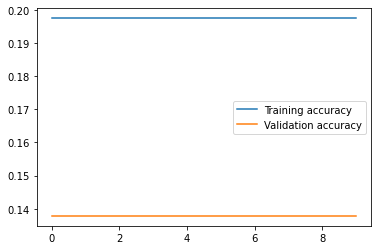

In [21]:
# Plot the training and validation accuracy curves
plt.plot(train_accs, label='Training accuracy')
plt.plot(val_accs, label='Validation accuracy')
plt.legend()
plt.show()

In [6]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

model = CatBoostClassifier(iterations=100, depth=5)


train_accs = []
val_accs = []

for epoch in range(3):
    model.fit(features0, labels_0)
    
    # Evaluate on the training data
    train_preds = model.predict(features0)
    train_acc = accuracy_score(labels_0, train_preds)
    train_accs.append(train_acc)
    
    # Evaluate on the validation data
    val_preds = model.predict(features1)
    val_acc = accuracy_score(labels_1, val_preds)
    val_accs.append(val_acc)
    
    # Print the accuracy for each epoch
    print(f"Epoch {epoch}: Training accuracy={train_acc}, Validation accuracy={val_acc}")


Learning rate set to 0.5
0:	learn: 3.7628454	total: 3.81s	remaining: 6m 17s
1:	learn: 3.6957501	total: 7.84s	remaining: 6m 24s
2:	learn: 3.6268815	total: 12.1s	remaining: 6m 32s
3:	learn: 3.5748805	total: 16s	remaining: 6m 24s
4:	learn: 3.5245864	total: 19.8s	remaining: 6m 15s
5:	learn: 3.4928999	total: 23.7s	remaining: 6m 11s
6:	learn: 3.4633670	total: 28.1s	remaining: 6m 12s
7:	learn: 3.4317445	total: 32.2s	remaining: 6m 10s
8:	learn: 3.4047738	total: 36.3s	remaining: 6m 7s
9:	learn: 3.3849323	total: 40.6s	remaining: 6m 5s
10:	learn: 3.3613707	total: 45s	remaining: 6m 4s
11:	learn: 3.3439557	total: 49s	remaining: 5m 59s
12:	learn: 3.3250520	total: 53.3s	remaining: 5m 56s
13:	learn: 3.3025861	total: 58.4s	remaining: 5m 58s
14:	learn: 3.2843043	total: 1m 3s	remaining: 5m 58s
15:	learn: 3.2731835	total: 1m 7s	remaining: 5m 54s
16:	learn: 3.2592078	total: 1m 11s	remaining: 5m 51s
17:	learn: 3.2479119	total: 1m 16s	remaining: 5m 48s
18:	learn: 3.2313536	total: 1m 20s	remaining: 5m 42s
19:

56:	learn: 2.8898541	total: 3m 47s	remaining: 2m 51s
57:	learn: 2.8808717	total: 3m 51s	remaining: 2m 47s
58:	learn: 2.8757524	total: 3m 56s	remaining: 2m 44s
59:	learn: 2.8700854	total: 4m	remaining: 2m 40s
60:	learn: 2.8664526	total: 4m 4s	remaining: 2m 36s
61:	learn: 2.8624252	total: 4m 8s	remaining: 2m 32s
62:	learn: 2.8576017	total: 4m 13s	remaining: 2m 28s
63:	learn: 2.8525901	total: 4m 17s	remaining: 2m 24s
64:	learn: 2.8484247	total: 4m 21s	remaining: 2m 20s
65:	learn: 2.8450753	total: 4m 25s	remaining: 2m 16s
66:	learn: 2.8428758	total: 4m 29s	remaining: 2m 12s
67:	learn: 2.8392731	total: 4m 33s	remaining: 2m 8s
68:	learn: 2.8338909	total: 4m 37s	remaining: 2m 4s
69:	learn: 2.8306759	total: 4m 41s	remaining: 2m
70:	learn: 2.8251415	total: 4m 44s	remaining: 1m 56s
71:	learn: 2.8211862	total: 4m 48s	remaining: 1m 52s
72:	learn: 2.8196852	total: 4m 52s	remaining: 1m 48s
73:	learn: 2.8155472	total: 4m 56s	remaining: 1m 44s
74:	learn: 2.8118180	total: 5m	remaining: 1m 40s
75:	learn

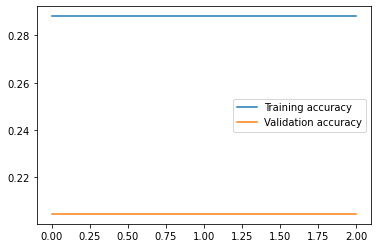

In [7]:
# Plot the training and validation accuracy curves
plt.plot(train_accs, label='Training accuracy')
plt.plot(val_accs, label='Validation accuracy')
plt.legend()
plt.show()